In [113]:
import wikipediaapi
import requests
import pandas
from bs4 import BeautifulSoup

EXTRACT ~ get the data from wikipedia website in the form of html

In [114]:
wikiurl="https://en.wikipedia.org/wiki/List_of_tz_database_time_zones"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

TRANSFORM ~ parse data from html into a BeautifulSoup object

In [115]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

convert list to dataframe

In [128]:
df=pd.read_html(str(indiatable))
df=pd.DataFrame(df[0])

drop the unwanted columns

In [132]:
df.drop(["Notes"], axis=1)
print(data.head())

                                  Country code(s)    TZ database name  \
                                  Country code(s)    TZ database name   
0  CI, BF, GH, GM, GN, IS, ML, MR, SH, SL, SN, TG      Africa/Abidjan   
1                                              GH        Africa/Accra   
2                                              ET  Africa/Addis_Ababa   
3                                              DZ      Africa/Algiers   
4                                              ER       Africa/Asmara   

  Area(s) covered       Type UTC offset±hh:mm         Time zoneabbreviation  \
  Area(s) covered       Type              STD     DST                   STD   
0             NaN  Canonical           +00:00  +00:00                   GMT   
1             NaN      Link†           +00:00  +00:00                   GMT   
2             NaN      Link†           +03:00  +03:00                   EAT   
3             NaN  Canonical           +01:00  +01:00                   CET   
4             

/var/folders/_l/t31rqf057m3fwrzq7xxzmxj40000gp/T/ipykernel_17537/412726932.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(["Notes"], axis=1)


LOAD ~ convert to csv file

In [123]:
#df.to_csv("TZ Database Time Zones.csv")

In [3]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import csv

In [4]:
df = pd.read_csv("TZ Database Time Zones.csv")

remove first row and columns of data frame

In [5]:
df = df.tail(-1)
df = df.drop("Area(s) covered", axis='columns')
df = df.drop("Unnamed: 0", axis='columns')
df.head()

,Country code(s),TZ database name,Type,UTC offset±hh:mm,UTC offset±hh:mm.1,Time zoneabbreviation,Time zoneabbreviation.1,Sourcefile
1,"CI, BF, GH, GM, GN, IS, ML, MR, SH, SL, SN, TG",Africa/Abidjan,Canonical,+00:00,+00:00,GMT,GMT,africa
2,GH,Africa/Accra,Link†,+00:00,+00:00,GMT,GMT,backward
3,ET,Africa/Addis_Ababa,Link†,+03:00,+03:00,EAT,EAT,backward
4,DZ,Africa/Algiers,Canonical,+01:00,+01:00,CET,CET,africa
5,ER,Africa/Asmara,Link†,+03:00,+03:00,EAT,EAT,backward


get column's data

In [6]:
column_names = df.columns
print(column_names)

time_zone = df["Time zoneabbreviation"]
print(time_zone) 

Index(['Country code(s)', 'TZ database name', 'Type', 'UTC offset±hh:mm',
       'UTC offset±hh:mm.1', 'Time zoneabbreviation',
       'Time zoneabbreviation.1', 'Sourcefile'],
      dtype='object')
1      GMT
2      GMT
3      EAT
4      CET
5      EAT
      ... 
593    SST
594    UTC
595    MSK
596    WET
597    UTC
Name: Time zoneabbreviation, Length: 597, dtype: object


timezone's descriptive stats

In [7]:
time_zone.describe()

count     597
unique     70
top       CST
freq       44
Name: Time zoneabbreviation, dtype: object

<AxesSubplot:>

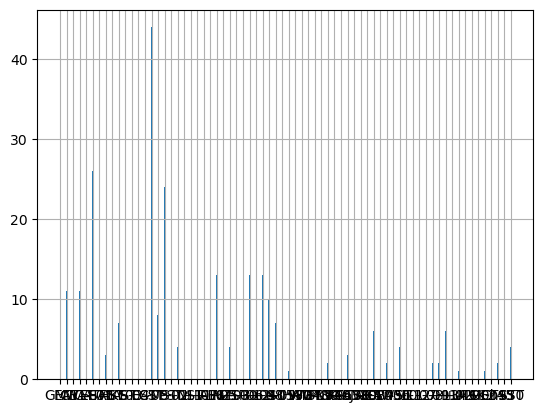

In [8]:
time_zone.hist(bins=len(time_zone))

From the histogram of time zones, you can see that the most common time zone by far is CST, aka central time zone. Meaning that a lot of time zone countries/names are under this certain time zone, making it by far the largest one.

Bar Graph

<BarContainer object of 26 artists>

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Time Zones')

Text(0.5, 1.0, 'Type for 20 Random Time Zones from TZ Database')

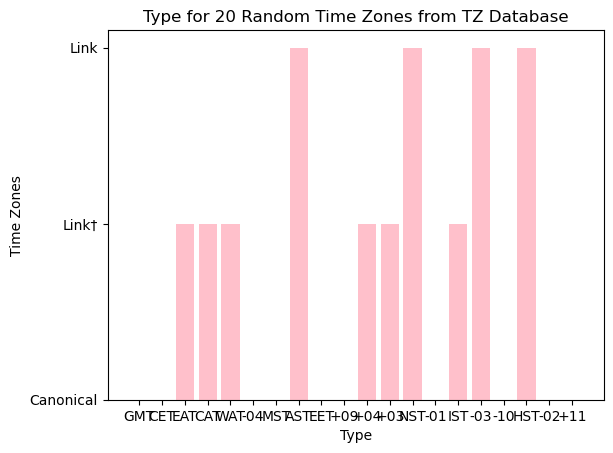

In [35]:
twenty_random_time_zones = [1,4,19,25,35,101,127,154,182,103,268,283,294,236,204,378,394,319,372,395,263,583,173,374,263,555]

time_zone_column = df["Time zoneabbreviation"]
type_column = df["Type"]

selected_time_zones = []
selected_types = []

for zone in twenty_random_time_zones:
    selected_time_zones.append(time_zone_column[zone])
    selected_types.append(type_column[zone])
    
# Now plot our bar graph
plt.bar(selected_time_zones, selected_types, color ='pink')

# Now add axis labels with units
plt.xlabel("Type")
plt.ylabel("Time Zones")

# We can add a title too
plt.title("Type for 20 Random Time Zones from TZ Database")

From the 20 randomly selected time zones, there are 10 Canonical, 6 Link (standard), 4 Link